In [1]:
from matplotlib import pyplot as plt
import numpy
import os

In [59]:
files = os.listdir(r"C:\Users\David\Documents\Serial Studio\CSV\Dwayne\2023\Jun\22")
files

['15-44-14.csv', '15-59-19.csv', '16-00-43.csv', '16-08-39.csv']

In [73]:
with open(r"""C:\\Users\\David\\Documents\\Serial Studio\\CSV\Dwayne\\2023\\Jun\22\\"""+files[0],"r") as f:
    data = f.readlines()

In [74]:
def get_data(name,start_limit=0,end_limit=-1):
    selected = []
    selectValue = name
    for line in data[start_limit:end_limit]:
        fields = line.split(',')
        #print(fields)
        for field in fields:
            name = field.split(":")[0]
            value = field.split(":")[-1]
            if name.strip()==selectValue:
                try: 
                    value = float(value)
                except:
                    value = 0
                selected.append(float(value))
    return selected

In [75]:
def calibrate_start():
    pitch = get_data("Pitch")
    last = 0

    pitch.reverse()
    for idx,val in enumerate(pitch):
        if val<65:
            last = len(pitch)-idx
            break
    return last

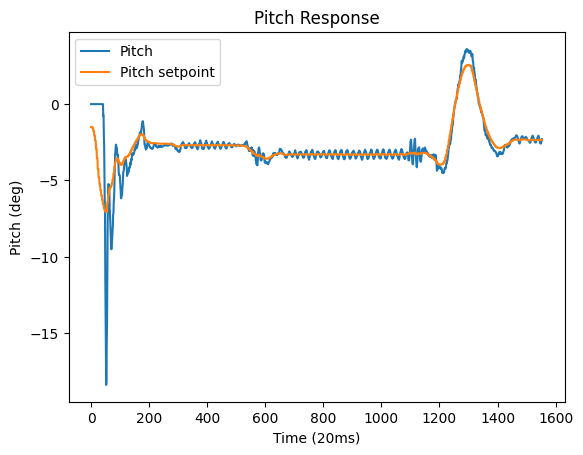

In [76]:
def plot_pitch():
    last = calibrate_start()
    measured_data = get_data("Pitch",0,-1)
    setpoint_data = get_data("PitchSetpoint",0,-1)
    plt.plot(measured_data,label="Pitch")
    plt.plot(setpoint_data,label="Pitch setpoint")
    plt.title("Pitch Response")
    plt.ylabel("Pitch (deg)")
    plt.xlabel("Time (20ms)")
    plt.legend()
plot_pitch()

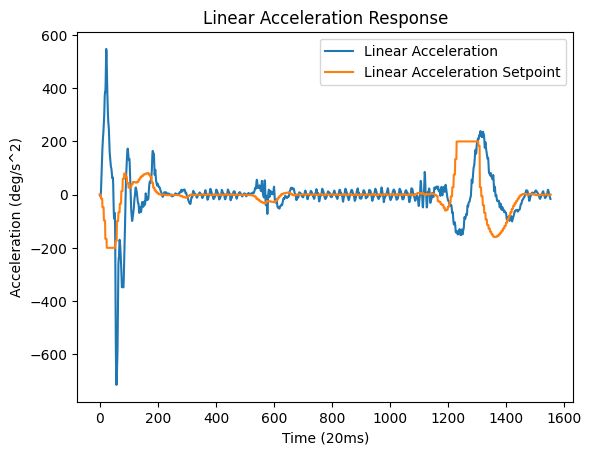

In [77]:
def plot_accel():
    last = calibrate_start()
    measured_data = get_data("LinearAccel",0,-1)
    setpoint_data = get_data("AccelSetpoint",0,-1)
    plt.plot(measured_data,label="Linear Acceleration")
    plt.plot(setpoint_data,label="Linear Acceleration Setpoint")
    plt.title("Linear Acceleration Response")
    plt.ylabel("Acceleration (deg/s^2)")
    plt.xlabel("Time (20ms)")
    plt.legend()
plot_accel()

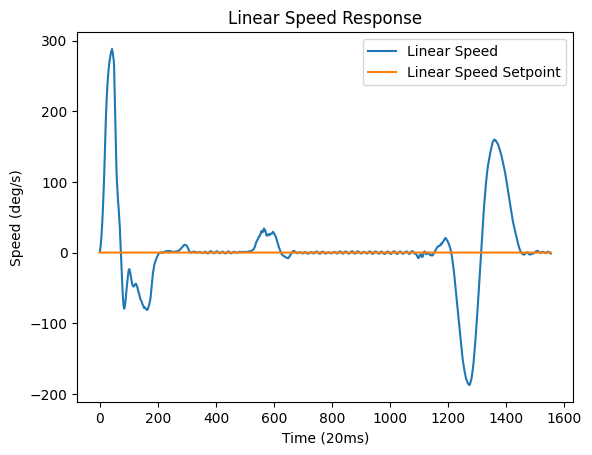

In [78]:
def plot_speed():
    last = calibrate_start()
    measured_data = get_data("LinearSpeed",0,-1)
    setpoint_data = get_data("speedSetpoint",0,-1)
    plt.plot(measured_data,label="Linear Speed")
    plt.plot(setpoint_data,label="Linear Speed Setpoint")
    plt.title("Linear Speed Response")
    plt.ylabel("Speed (deg/s)")
    plt.xlabel("Time (20ms)")
    plt.legend()
plot_speed()

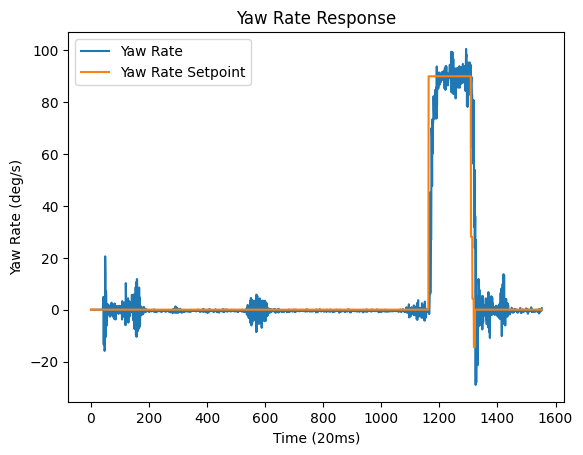

In [79]:
def plot_yaw_rate():
    last = calibrate_start()
    measured_data = get_data("YawRate",0,-1)
    setpoint_data = get_data("yawRateSetpoint",0,-1)
    plt.plot(measured_data,label="Yaw Rate")
    plt.plot(setpoint_data,label="Yaw Rate Setpoint")
    plt.title("Yaw Rate Response")
    plt.ylabel("Yaw Rate (deg/s)")
    plt.xlabel("Time (20ms)")
    plt.legend()
plot_yaw_rate()